In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


C:\Users\Nived Shah\AppData\Local\Temp\ipykernel_28652\693829924.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading the dataset

The dataset HIGGs does not have the column headings, which means we need to set "header = None" so that we do not lose one data point when converting to pandas dataframe

In [2]:
# The following lines were used to unzip the dataset and convert to csv (need not be run again, as the current
# uploaded files has the smaller version of it)

# df = pd.read_csv('HIGGS.csv', header = None)
# df

In [3]:
# column_names = ['class',
#     'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
#     'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_btag',
#     'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_btag',
#     'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_btag',
#     'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_btag',
#     'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
# ]

# df.columns = column_names

### Sampling

Stratified Sampling - TODO Explain

In [4]:
# df = df.groupby('class').apply(lambda x: x.sample(frac=.01, random_state=42)).reset_index(drop = True)
# df.to_csv('HIGGS_smaller_updated.csv', index = False)

In [5]:
df = pd.read_csv('HIGGS_smaller_updated.csv')
df

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.0,0.795907,0.521993,1.266055,1.193820,-1.345527,1.050368,0.023740,-0.202843,0.000000,...,1.112191,0.023700,0.000000,1.042175,1.027780,0.985253,0.817024,0.931846,0.893235,0.815815
1,0.0,0.439039,-0.246468,-1.633201,2.165616,-1.280181,1.113852,0.099988,0.030652,0.000000,...,1.272093,1.334957,3.101961,0.847423,1.107451,0.992869,0.645746,0.615797,1.053485,1.169667
2,0.0,0.792429,-0.225041,0.476488,0.216189,-0.653596,0.706933,-1.342777,1.307932,2.173076,...,-1.075636,-1.354807,3.101961,0.812245,0.768737,0.984995,0.809043,0.516027,0.810711,0.770562
3,0.0,2.508689,0.605754,0.057012,1.908093,0.369292,1.448035,1.172407,-1.662516,2.173076,...,1.333722,-1.187779,0.000000,0.483426,0.583755,0.980170,1.504814,0.745402,1.502971,1.080458
4,0.0,0.956040,-0.425679,0.380497,0.382192,1.287647,1.112112,1.256576,0.019010,2.173076,...,-1.447075,0.845525,0.000000,1.010567,1.105782,0.990340,1.734094,1.841294,1.493804,1.189773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1.0,1.326267,-1.027591,-0.629456,1.147094,-0.038268,1.000717,-0.334723,1.111683,2.173076,...,0.176098,-0.395917,0.000000,0.471924,0.605922,0.988520,0.860052,1.002536,1.008905,0.764430
109996,1.0,0.534753,-1.201932,-0.766507,0.721336,-1.586289,0.814297,-0.636743,0.779613,0.000000,...,1.446986,0.315584,0.000000,0.903345,0.907817,0.989411,0.542765,0.531479,0.656743,0.770066
109997,1.0,0.524138,1.794970,0.293383,0.789934,1.561737,0.736888,1.280342,-0.677391,2.173076,...,2.052449,-0.951386,0.000000,0.932308,0.815919,0.987882,0.829535,0.607425,0.616863,0.606310
109998,1.0,0.971595,0.186948,-0.499616,1.675635,-0.546097,0.918546,-0.355518,1.199275,2.173076,...,0.028688,1.523072,0.000000,0.743745,0.679649,0.981990,1.026166,0.623709,1.111592,0.875511


### Constants

The section below sets all the constants that might be required in the notebook.

In [6]:
RANDOM_STATE = 42
y_col = "class"

### Quick Feature Analysis

Data Types

Verifying whether all the data points have numerical values (since the original data did not have header)


In [7]:
df.dtypes 

class                       float64
lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet_1_pt                    float64
jet_1_eta                   float64
jet_1_phi                   float64
jet_1_btag                  float64
jet_2_pt                    float64
jet_2_eta                   float64
jet_2_phi                   float64
jet_2_btag                  float64
jet_3_pt                    float64
jet_3_eta                   float64
jet_3_phi                   float64
jet_3_btag                  float64
jet_4_pt                    float64
jet_4_eta                   float64
jet_4_phi                   float64
jet_4_btag                  float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

#### Missing Value Analysis

None of the columns have missing values, hence no need to perform any data imputations

In [8]:
df.isna().sum()

class                       0
lepton_pT                   0
lepton_eta                  0
lepton_phi                  0
missing_energy_magnitude    0
missing_energy_phi          0
jet_1_pt                    0
jet_1_eta                   0
jet_1_phi                   0
jet_1_btag                  0
jet_2_pt                    0
jet_2_eta                   0
jet_2_phi                   0
jet_2_btag                  0
jet_3_pt                    0
jet_3_eta                   0
jet_3_phi                   0
jet_3_btag                  0
jet_4_pt                    0
jet_4_eta                   0
jet_4_phi                   0
jet_4_btag                  0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

#### Target Variable Analysis

Class with value 1 represents SIGNAL (53% of the data), and Class with value 0 represents BACKGROUND (47% of the data)

Looks like there is very little imbalance in data. 

In [9]:
df[y_col].value_counts() / len(df)

class
1.0    0.529918
0.0    0.470082
Name: count, dtype: float64

### Simple Statistcal Analysis

Using the `describe` function we can see some simple statistics of all the columns. Given there are so many columns, it is hard to see understand the distrubtion and what each columns represent. Hence we will then move to plots to understand better.

In [10]:
df.describe()

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,...,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.529918,0.990136,-0.005788,0.001553,1.000278,0.001863,0.990156,0.001501,-0.003962,1.001442,...,0.000049,0.000948,1.001539,1.036259,1.024668,1.050452,1.010970,0.970571,1.032646,0.959388
std,0.499106,0.566492,1.008337,1.005915,0.601879,1.007750,0.475149,1.008162,1.005865,1.027335,...,1.011076,1.006068,1.400639,0.679834,0.381036,0.164679,0.396363,0.521311,0.364397,0.313120
min,0.000000,0.274697,-2.433028,-1.742508,0.002473,-1.743944,0.138602,-2.967745,-1.741237,0.000000,...,-2.497265,-1.742691,0.000000,0.102873,0.271377,0.133199,0.228777,0.066276,0.359259,0.381396
25%,0.000000,0.588740,-0.744166,-0.870266,0.577160,-0.870849,0.680000,-0.681304,-0.875857,0.000000,...,-0.714190,-0.868149,0.000000,0.790204,0.845568,0.985777,0.769679,0.672573,0.820276,0.770350
50%,1.000000,0.851724,-0.006872,0.000971,0.892844,0.001734,0.893995,-0.004977,-0.004100,1.086538,...,-0.002126,-0.004149,0.000000,0.894896,0.950084,0.989766,0.918934,0.872941,0.946992,0.872299
75%,1.000000,1.233481,0.732370,0.875988,1.296042,0.876362,1.167809,0.687194,0.862769,2.173076,...,0.714934,0.871744,3.101961,1.024735,1.083739,1.019925,1.142902,1.136033,1.139619,1.057903
max,1.000000,8.170258,2.434868,1.743236,9.420980,1.743257,7.400489,2.969674,1.741454,2.173076,...,2.498009,1.743372,3.101961,18.852451,9.749496,5.425464,7.573939,9.879900,8.050391,5.949618


### Plots

#### Histogram Plots

Given all the fields are numerical, it makes sense to first see what the data distribution (histogram) looks like. We plot the histograms in differnt colors for different class to see if there is anything we can understand from the data.

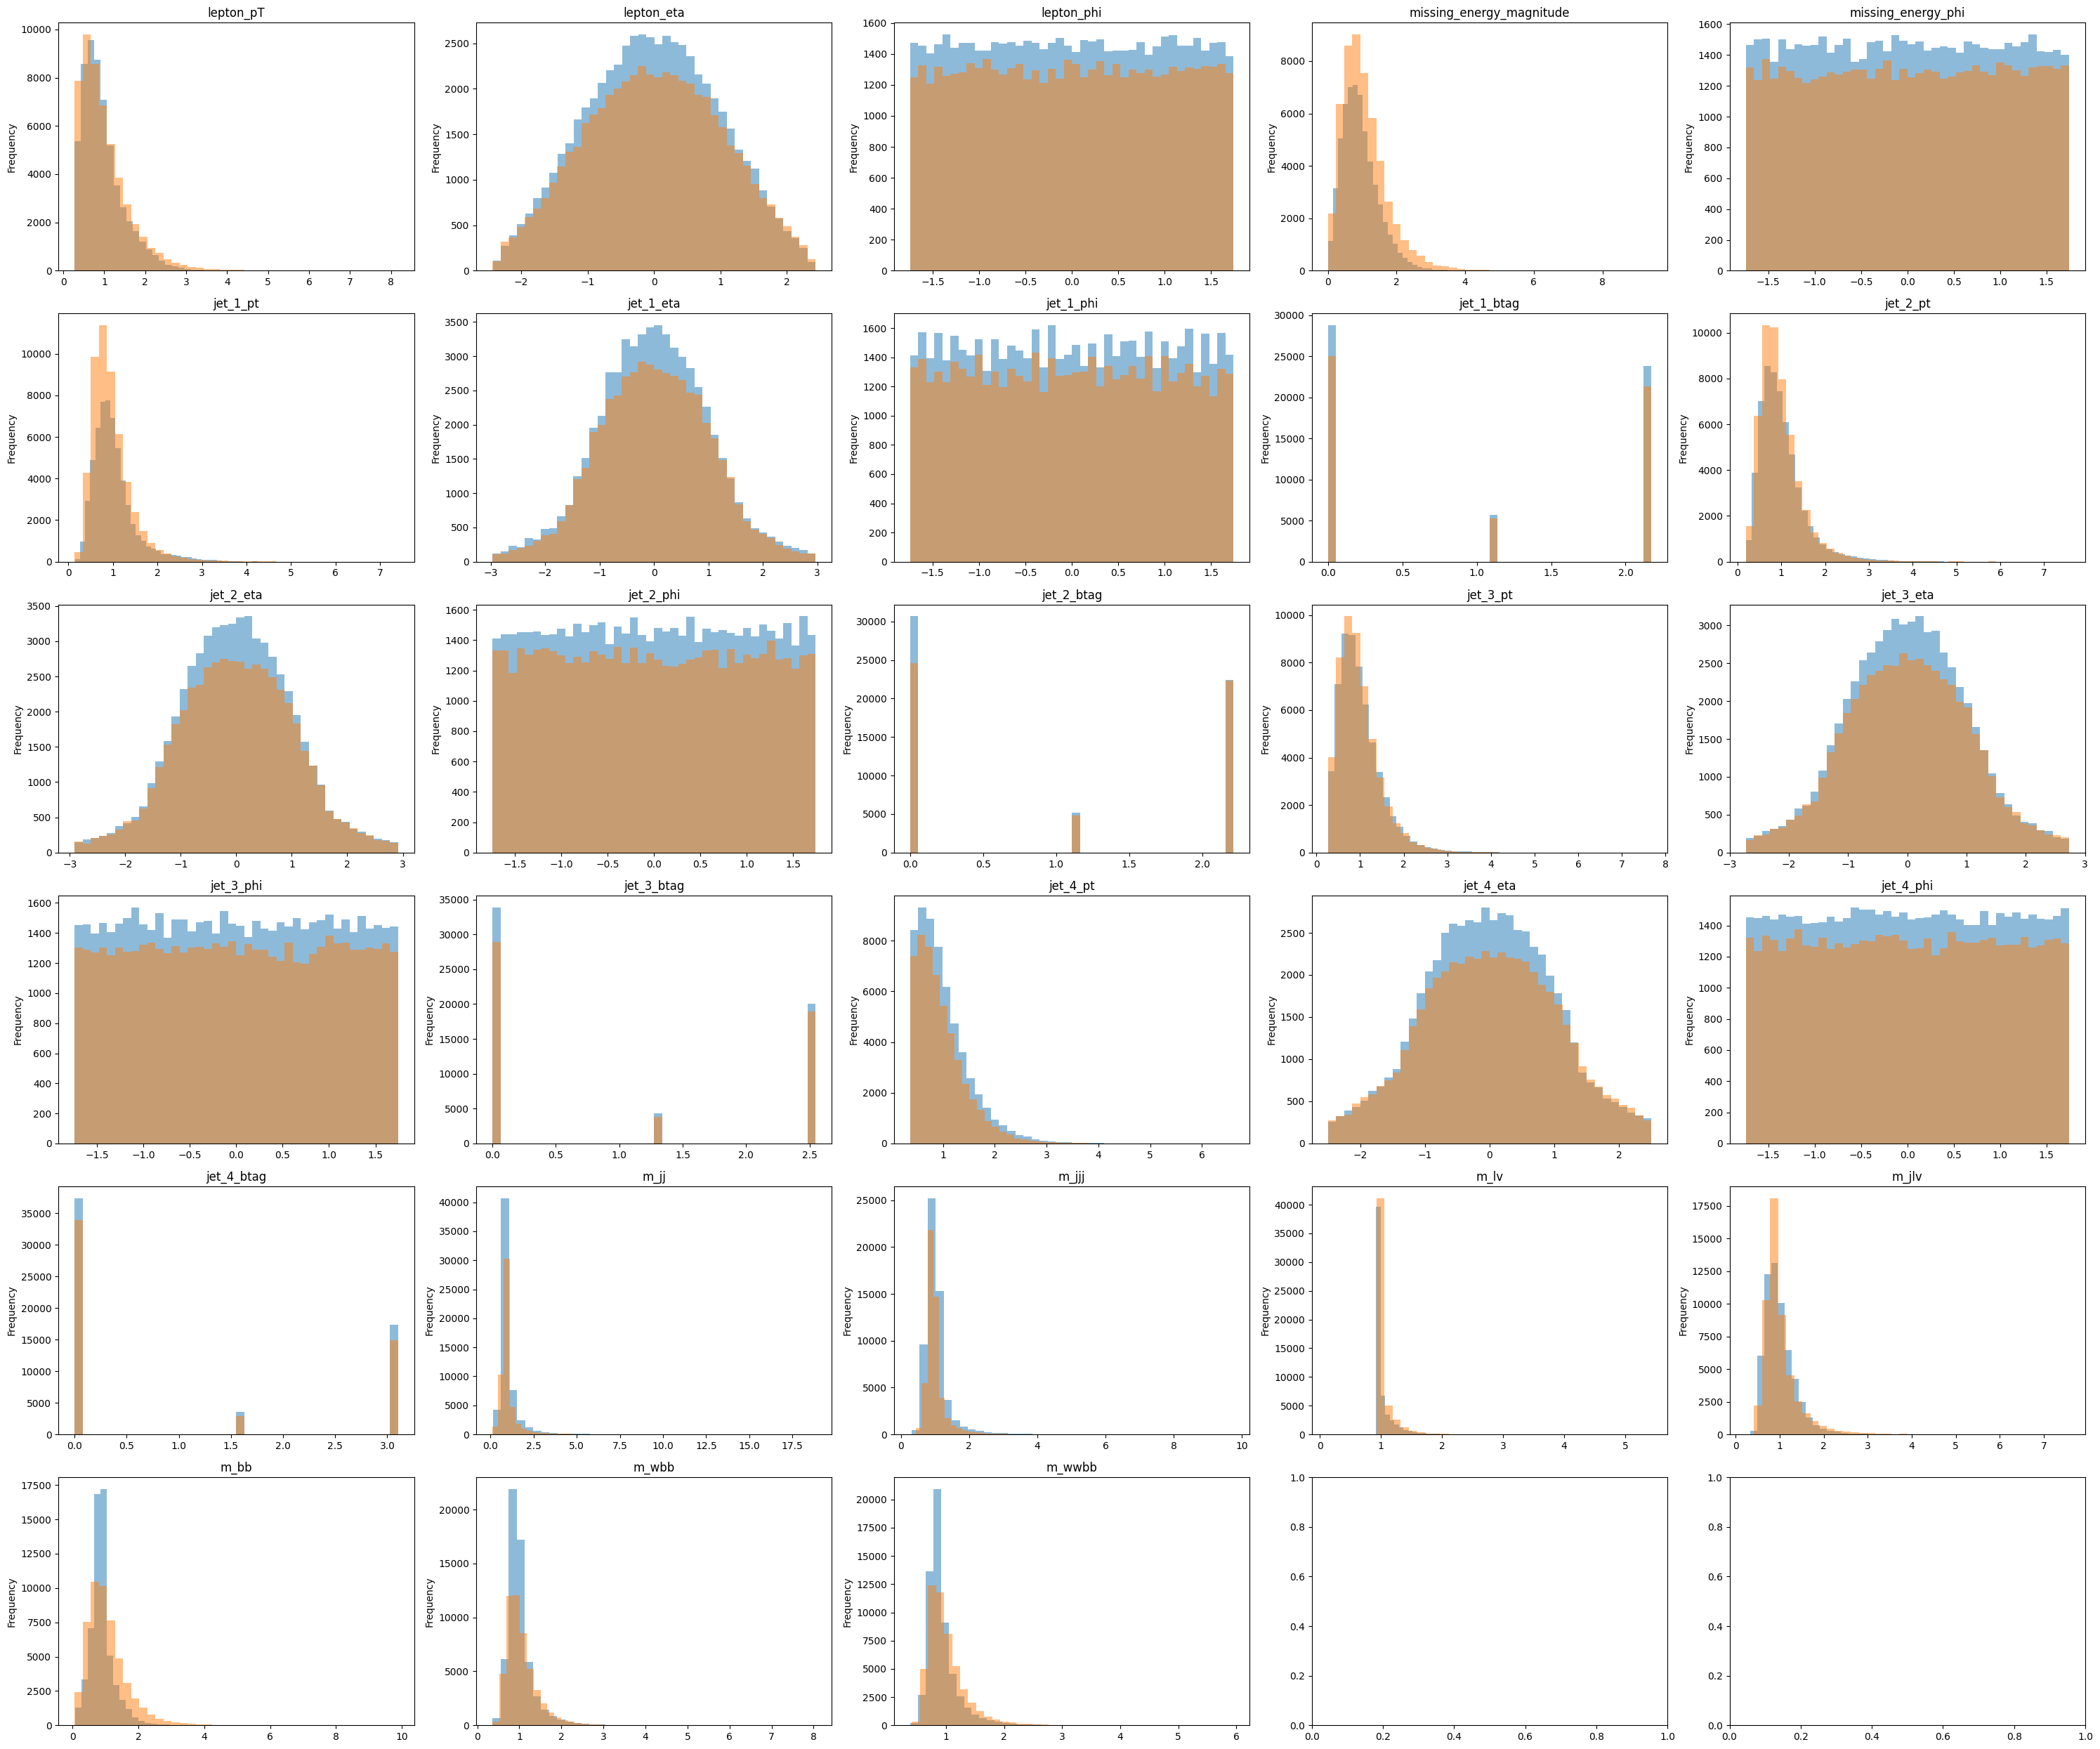

In [11]:
total_columns = len(df.columns) - 1

num_cols = 5
num_rows = (total_columns // num_cols) + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize = (5*num_rows, 5*num_cols))
for i, col in enumerate(df.drop(columns = [y_col]).columns):
    
    ax = axs[i // num_cols][i % num_cols]
    
    
    df[df[y_col] == 1][col].plot.hist(bins = 40, ax = ax, color = 'tab:blue', alpha=0.5)
    df[df[y_col] == 0][col].plot.hist(bins = 40, ax = ax, color = 'tab:orange', alpha=0.5)
    
    ax.set_title(col)

plt.tight_layout()
plt.show()

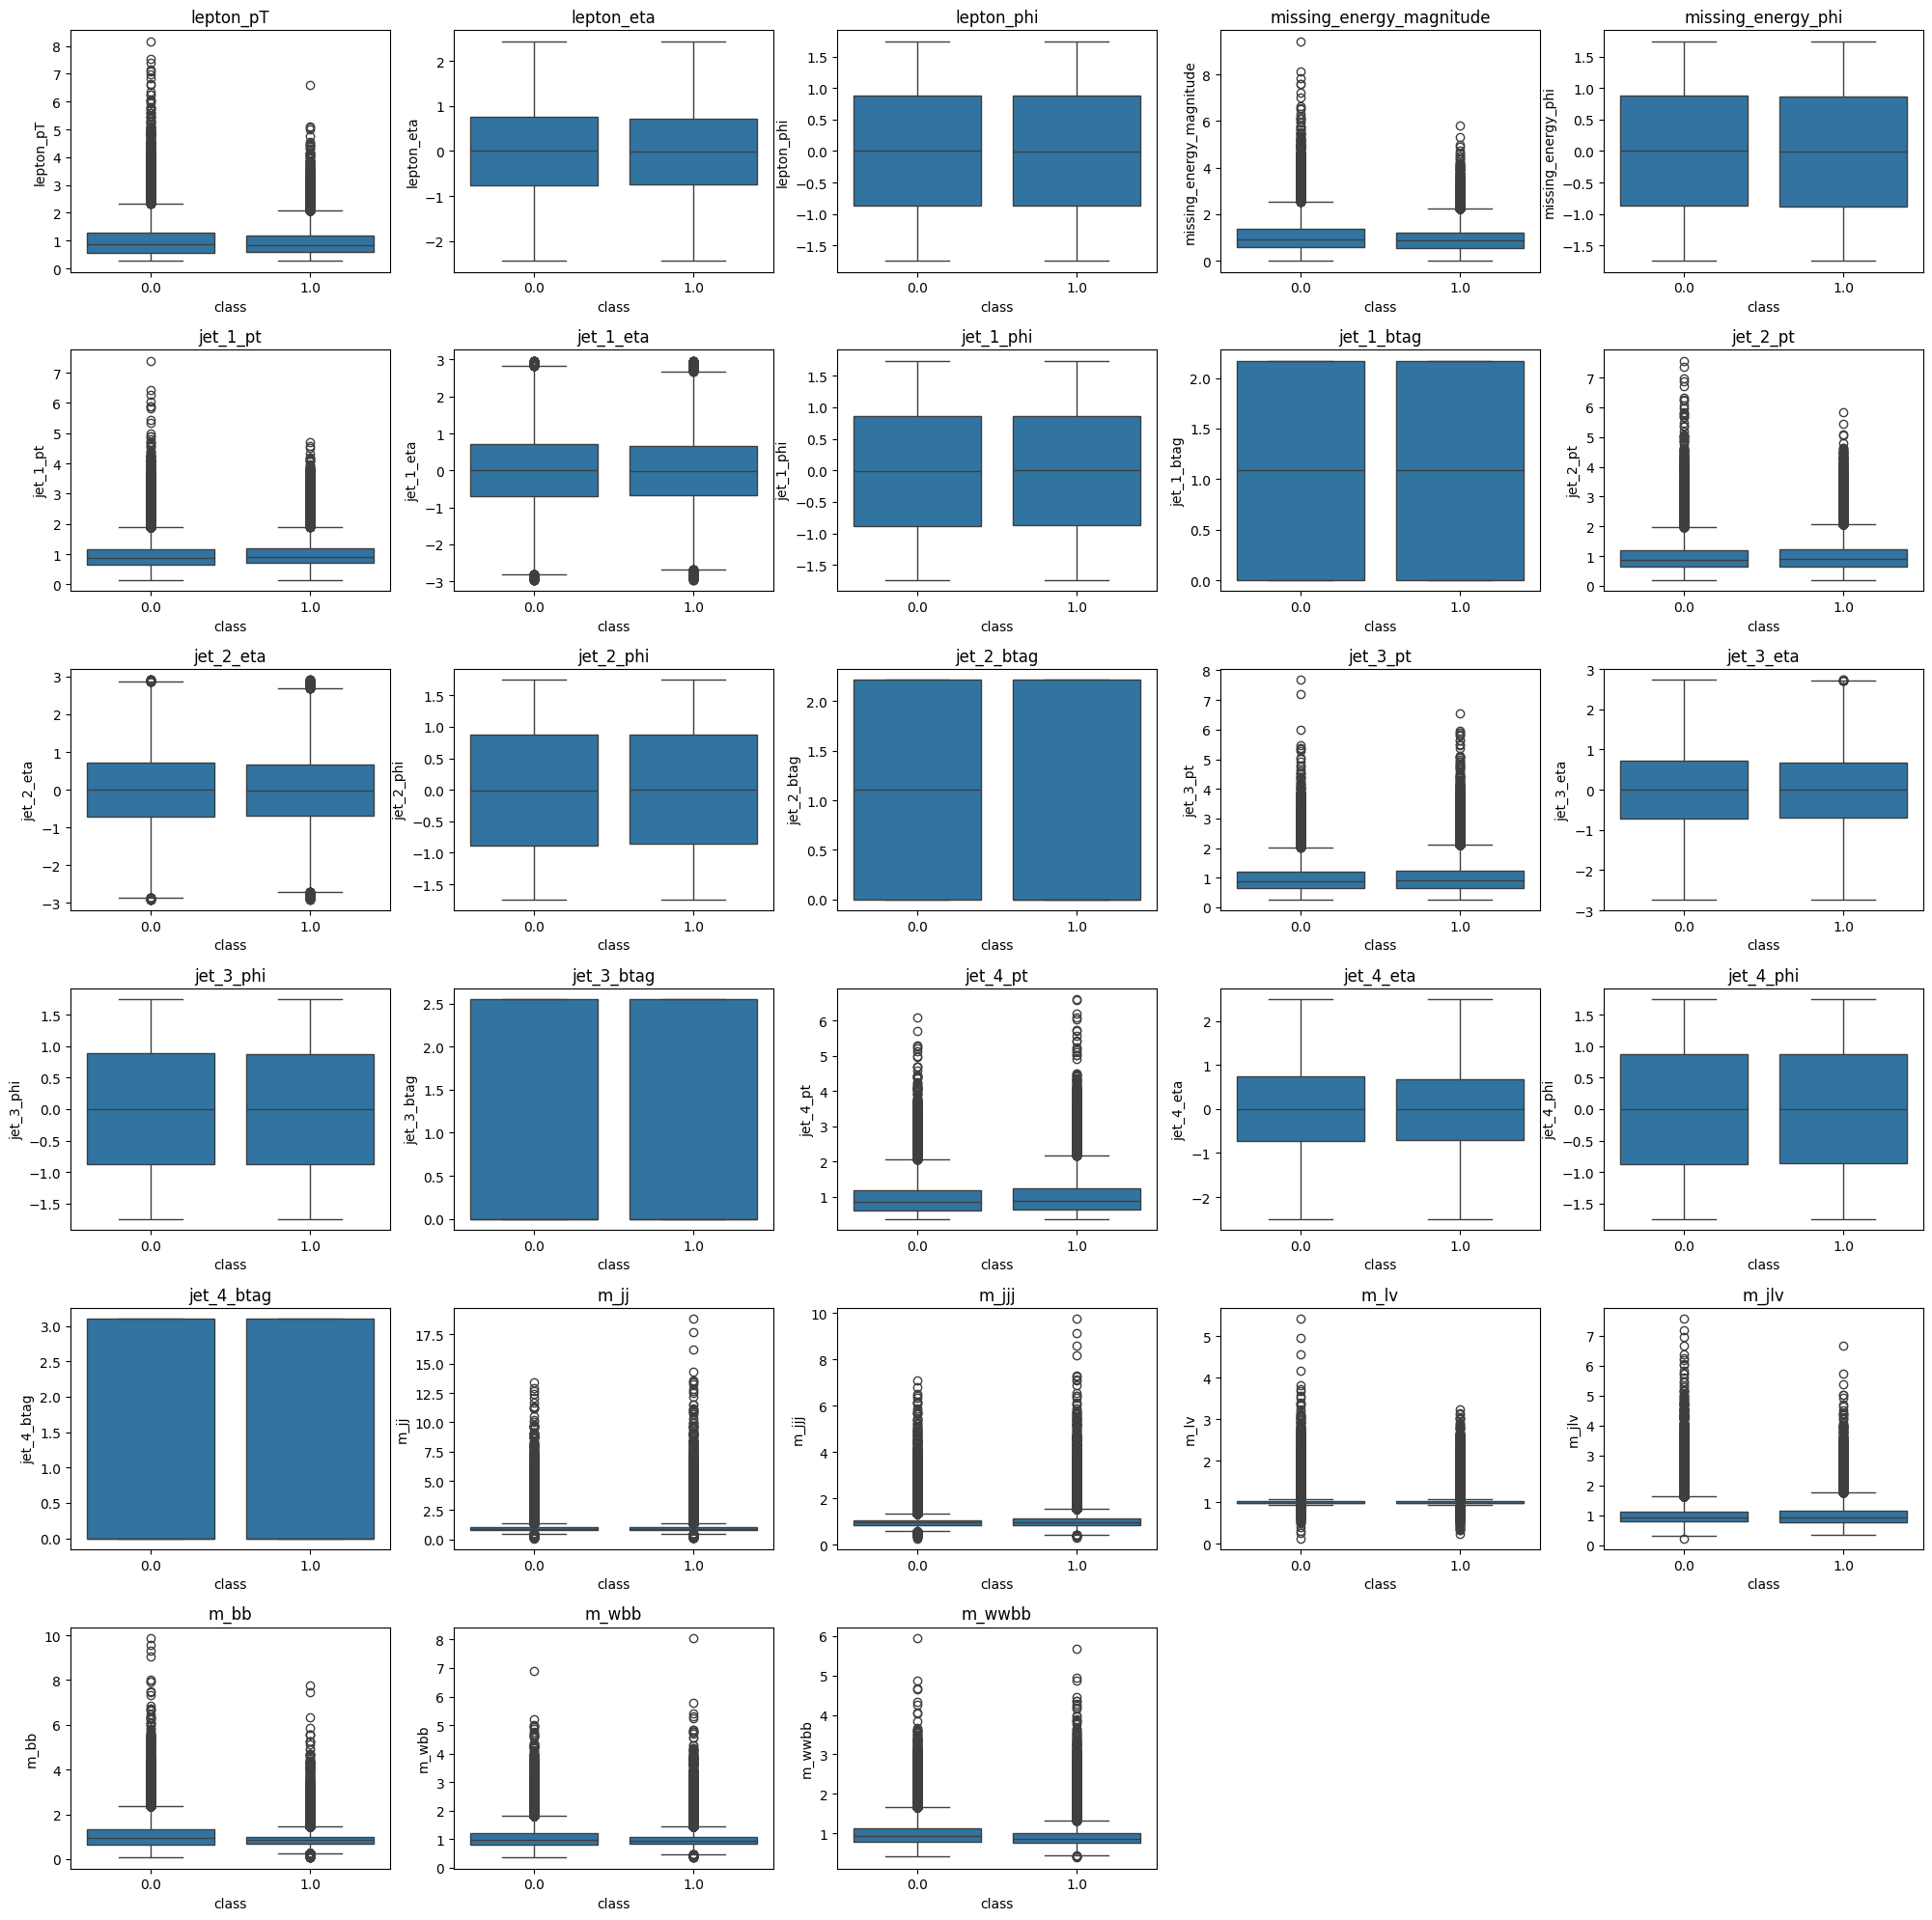

In [12]:
# conditional boxplots of all the features with respect to the classes 0 and 1
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


The box plots of the features conditional on the class show that the features have no charactersitic differences between the classes

We can also see that nearly half the features have values outside the whiskers of the box plots. 
This means that we cannot ignore such values as outliers, as they are present in a significant number.
Thus outlier detecter for this dataset is not a good idea and we can proceed with the normalization/standardization of the features

In [13]:
# splitting the data into features and target
X = df.drop('class', axis=1)
y = df['class']

y = pd.DataFrame(y, columns = [y_col])

### Data Normalization


We will normalize the data such that mean is 0 and standard deviation is 1

In [14]:
for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()

X.describe()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,jet_4_eta,jet_4_phi,jet_4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,...,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05,1.100000e+05
mean,3.178064e-17,2.286656e-17,2.344791e-17,1.756978e-17,2.968131e-17,6.252776e-17,-2.015358e-17,2.467521e-17,-1.087453e-16,-9.560030e-18,...,-5.813531e-18,-5.942721e-18,-3.539795e-17,-8.746135e-17,-6.201100e-18,1.976601e-16,-2.433932e-16,-6.614507e-17,-1.131701e-16,1.338404e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.262929e+00,-2.407172e+00,-1.733806e+00,-1.657815e+00,-1.732381e+00,-1.792185e+00,-2.945207e+00,-1.727146e+00,-9.747967e-01,-1.603086e+00,...,-2.469957e+00,-1.733123e+00,-7.150585e-01,-1.372963e+00,-1.976956e+00,-5.569955e+00,-1.973426e+00,-1.734657e+00,-1.847947e+00,-1.845909e+00
25%,-7.085638e-01,-7.322735e-01,-8.666932e-01,-7.029948e-01,-8.660003e-01,-6.527545e-01,-6.772768e-01,-8.668118e-01,-9.747967e-01,-6.731424e-01,...,-7.064148e-01,-8.638557e-01,-7.150585e-01,-3.619350e-01,-4.700332e-01,-3.927361e-01,-6.087640e-01,-5.716323e-01,-5.827976e-01,-6.037216e-01
50%,-2.443313e-01,-1.074799e-03,-5.785335e-04,-1.784978e-01,-1.274844e-04,-2.023808e-01,-6.425388e-03,-1.367444e-04,8.283152e-02,-2.010096e-01,...,-2.151226e-03,-5.065908e-03,-7.150585e-01,-2.079384e-01,-1.957396e-01,-3.685119e-01,-2.322015e-01,-1.872776e-01,-2.350558e-01,-2.781327e-01
75%,4.295649e-01,7.320557e-01,8.692925e-01,4.914012e-01,8.677742e-01,3.738896e-01,6.801415e-01,8.616775e-01,1.140460e+00,4.176754e-01,...,7.070546e-01,8.655442e-01,1.499618e+00,-1.695127e-02,1.550280e-01,-1.853727e-01,3.328554e-01,3.173955e-01,2.935614e-01,3.146255e-01
max,1.267470e+01,2.420478e+00,1.731441e+00,1.399068e+01,1.728003e+00,1.349122e+01,2.944142e+00,1.735239e+00,1.140460e+00,1.312927e+01,...,2.470596e+00,1.731915e+00,1.499618e+00,2.620669e+01,2.289764e+01,2.656693e+01,1.655797e+01,1.709024e+01,1.925850e+01,1.593711e+01


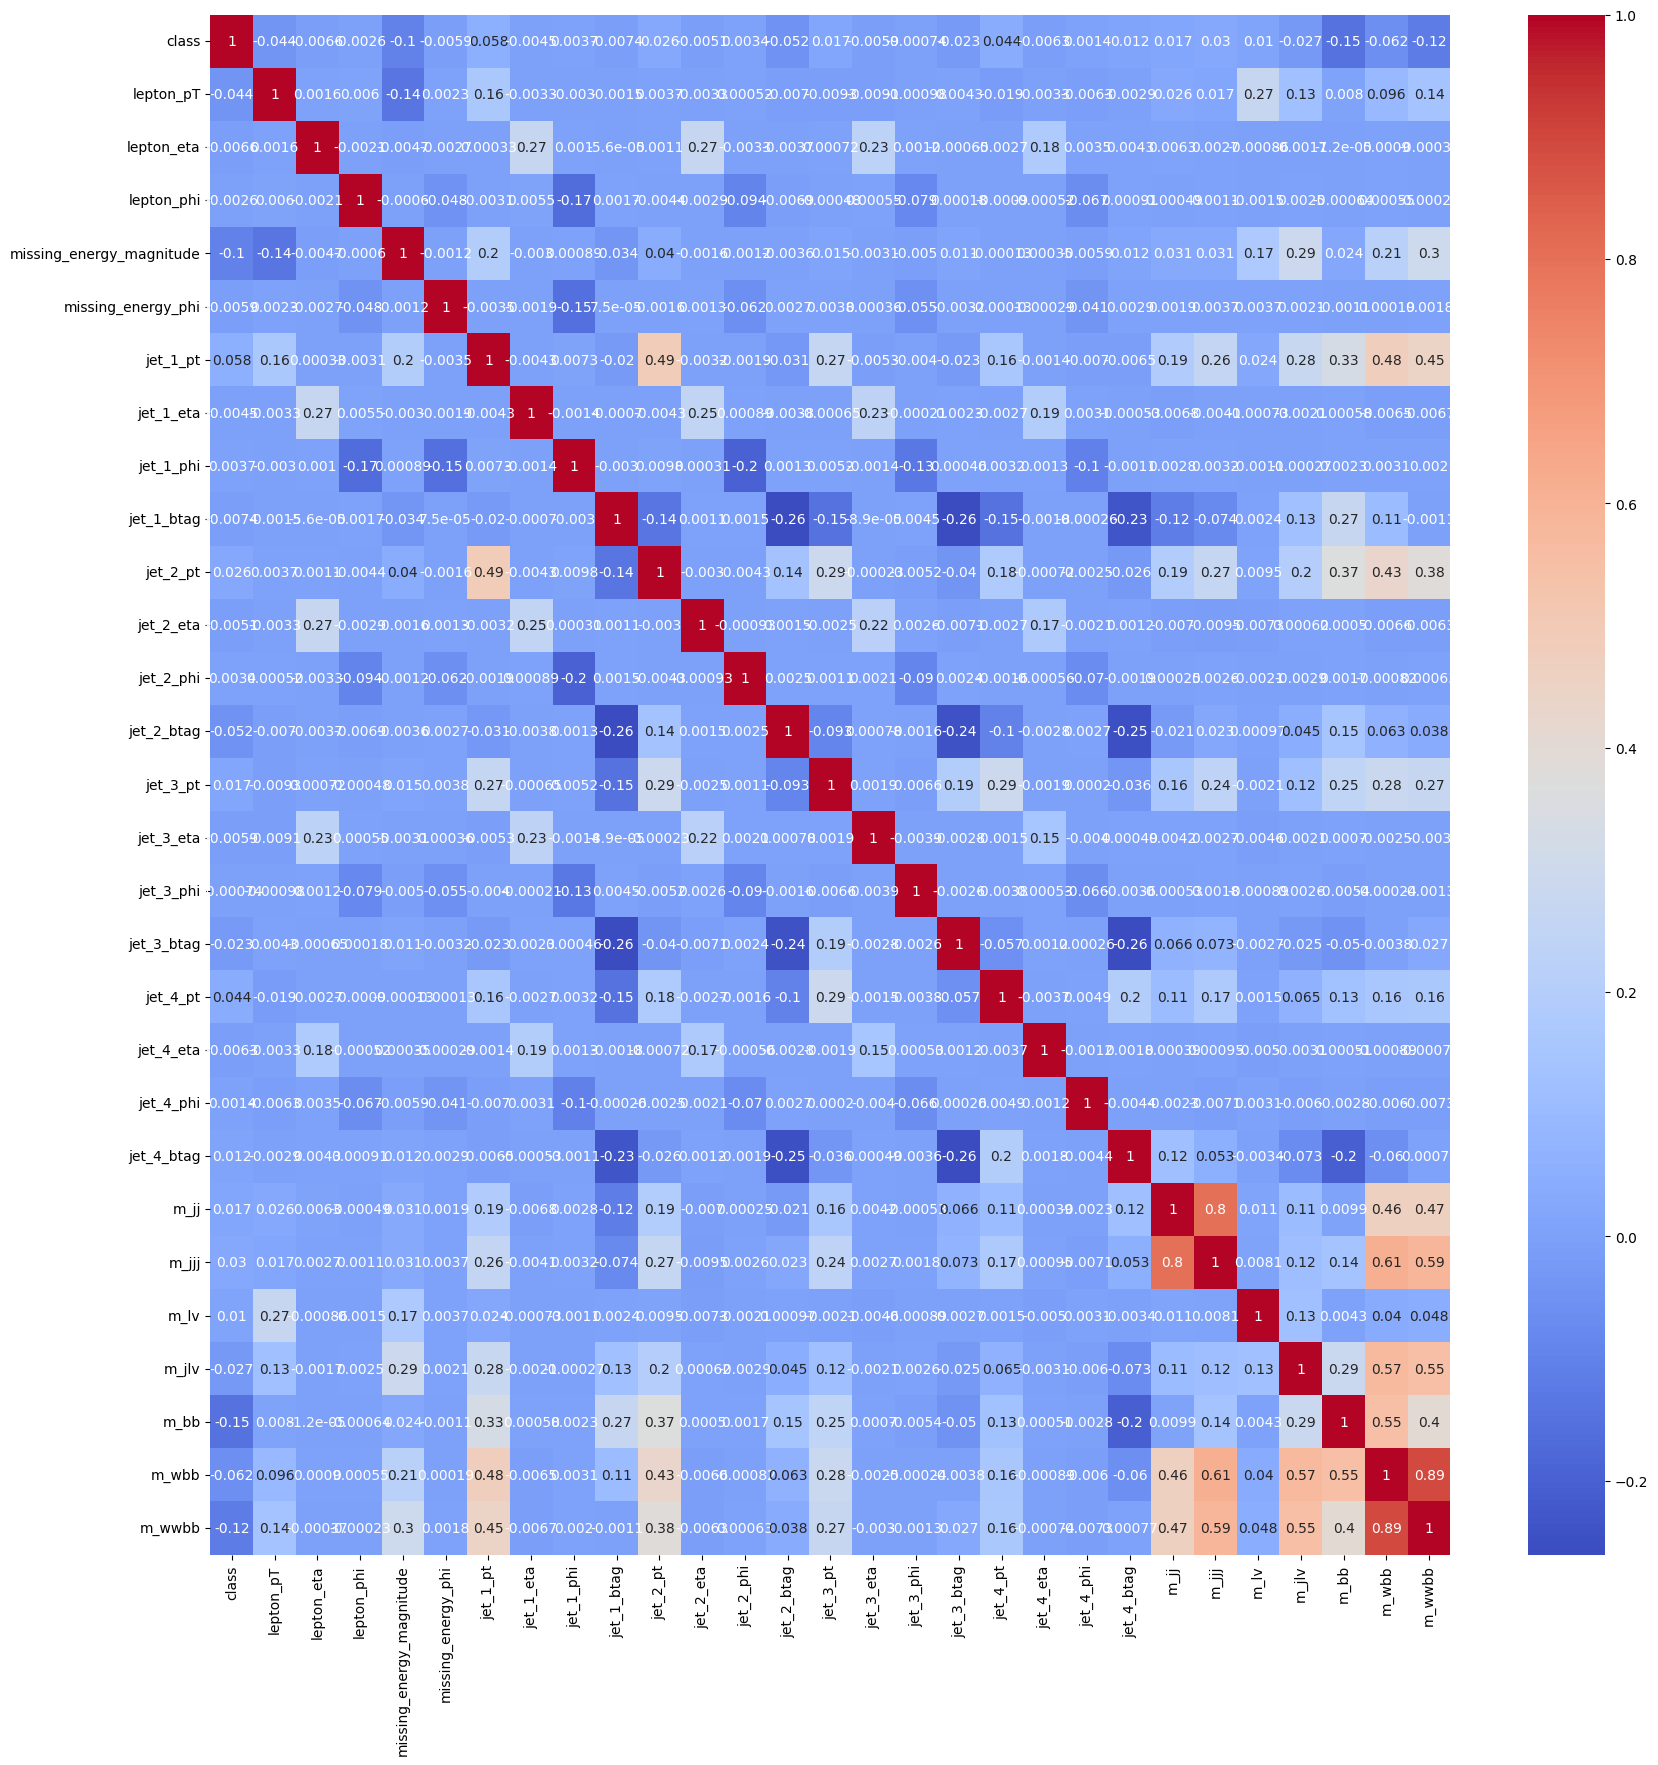

In [15]:
# correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


As evident in the correlation matrix, in general the features are not correlated with each other, but m_wbb and m_wwbb are highly correlated with each other which means we can drop one of them (wbb here)

In [16]:
# drop the column m_wbb
X.drop('m_wbb', axis=1, inplace=True)

### Feature Engineering

Some insights were drawn from discussions with ChatGPT. It suggested added a new features that combined the "jets" by adding them.

The use of GPT enabled me to get an insight into the domain of the problem, without which, it could have been a little difficult to decide what type of engineering was required.


In [17]:
# Feature Engineering, adding new features

# adding the sum of the transverse momenta of the jets
X['sum_jet_pt'] = X['jet_1_pt'] + X['jet_2_pt'] + X['jet_3_pt'] + X['jet_4_pt']

# adding the sum of the btag values of the jets
X['sum_jet_btag'] = X['jet_1_btag'] + X['jet_2_btag'] + X['jet_3_btag'] + X['jet_4_btag']
X['sum_jet_eta'] = X['jet_1_eta'] + X['jet_2_eta'] + X['jet_3_eta'] + X['jet_4_eta']
X['sum_jet_phi'] = X['jet_1_phi'] + X['jet_2_phi'] + X['jet_3_phi'] + X['jet_4_phi']

X['mass_combination'] = X['m_bb'] + X['m_wwbb']
X['missing_energy_lepton_diff'] = X['missing_energy_magnitude'] - X['lepton_pT']

X.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_btag,jet_2_pt,...,m_lv,m_jlv,m_bb,m_wwbb,sum_jet_pt,sum_jet_btag,sum_jet_eta,sum_jet_phi,mass_combination,missing_energy_lepton_diff
0,-0.342864,0.523418,1.257066,0.321562,-1.337028,0.126724,0.022059,-0.197721,-0.974797,0.010558,...,-0.395921,-0.489314,-0.074283,-0.458523,-0.059518,-0.304709,0.865719,-0.240715,-0.532806,0.664425
1,-0.972824,-0.238690,-1.625141,1.936165,-1.272184,0.260332,0.097689,0.034412,-0.974797,-0.529417,...,-0.349672,-0.921439,-0.680543,0.671561,-0.820514,-1.264681,0.546454,1.026255,-0.008982,2.908989
2,-0.349002,-0.217440,0.472141,-1.302735,-0.650418,-0.596072,-1.333395,1.304245,1.140460,-0.759830,...,-0.397487,-0.509450,-0.871925,-0.603044,-1.893023,0.850576,-5.357521,-1.463151,-1.474969,-0.953733
3,2.680624,0.606487,0.055133,1.508300,0.364604,0.963656,1.161426,-1.648884,1.140460,0.222126,...,-0.426783,1.245937,-0.431929,0.386658,-1.019386,0.743814,4.110039,-3.037249,-0.045270,-1.172323
4,-0.060189,-0.416419,0.376715,-1.026926,1.275897,0.256669,1.244914,0.022838,1.140460,0.770644,...,-0.365029,1.824396,1.670256,0.735773,-0.570900,0.743814,1.732034,-1.907158,2.406029,-0.966737


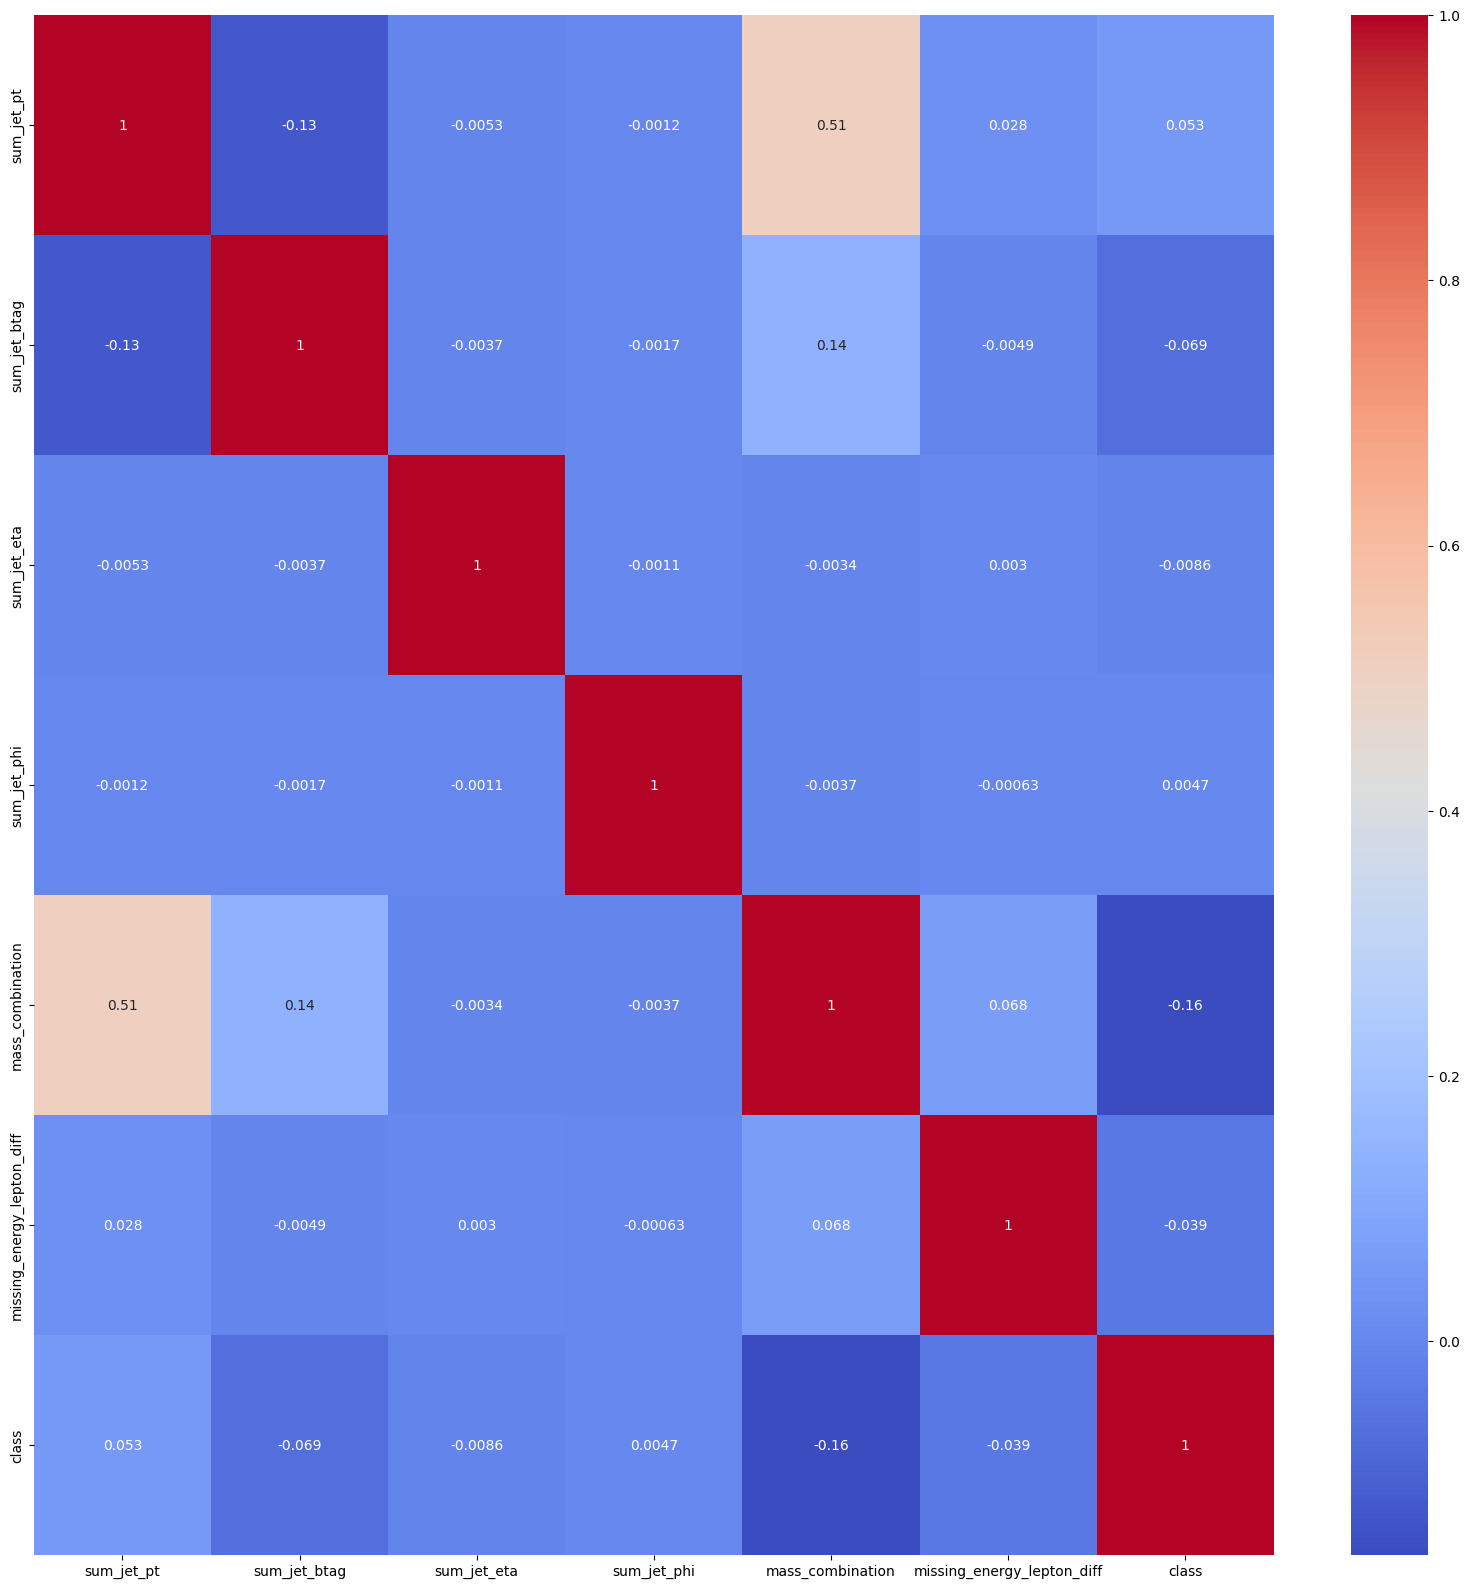

In [18]:
# see correlation of new features with the target
# create a temporary df to store only the new features and the target
temp_df = X.iloc[:, 27:33]
temp_df['class'] = y

corr_matrix = temp_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [19]:
# the correlation seems to improve a little for sum_jet_pt, sum_jet_btag and mass_combination
# thus we can keep these features and drop the rest

X.drop(['sum_jet_eta', 'sum_jet_phi', 'missing_energy_lepton_diff'], axis=1, inplace=True)


In [20]:
# add the squares of the features
for col in X.columns:
    X[col + '_squared'] = X[col] ** 2

### Feature Selection

We will use the SelectKBest as our selection algorithm



In [21]:
# using f_classif as the scoring function
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)

X_new = pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

# get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

X_new.head()

c:\Users\Nived Shah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,lepton_pT,missing_energy_magnitude,jet_1_pt,jet_2_btag,jet_4_pt,m_jjj,m_bb,m_wwbb,sum_jet_pt,sum_jet_btag,mass_combination,lepton_pT_squared,missing_energy_magnitude_squared,jet_4_eta_squared,m_jlv_squared,m_bb_squared,m_wwbb_squared,sum_jet_pt_squared,sum_jet_btag_squared,mass_combination_squared
0,-0.342864,0.321562,0.126724,1.154169,-0.305894,0.008167,-0.074283,-0.458523,-0.059518,-0.304709,-0.532806,0.117555,0.103402,1.209911,0.239428,0.005518,0.210243,0.003542,0.092848,0.283882
1,-0.972824,1.936165,0.260332,-0.953745,-0.117449,0.217258,-0.680543,0.671561,-0.820514,-1.264681,-0.008982,0.946387,3.748735,1.582840,0.849050,0.463139,0.450995,0.673244,1.599417,0.000081
2,-0.349002,-1.302735,-0.596072,-0.953745,-0.489038,-0.671672,-0.871925,-0.603044,-1.893023,0.850576,-1.474969,0.121802,1.697118,1.131885,0.259539,0.760252,0.363662,3.583536,0.723480,2.175532
3,2.680624,1.508300,0.963656,1.154169,-0.899665,-1.157142,-0.431929,0.386658,-1.019386,0.743814,-0.045270,7.185745,2.274970,1.739929,1.552359,0.186562,0.149505,1.039148,0.553260,0.002049
4,-0.060189,-1.026926,0.256669,1.154169,-1.094858,0.212876,1.670256,0.735773,-0.570900,0.743814,2.406029,0.003623,1.054577,2.048537,3.328422,2.789756,0.541362,0.325927,0.553260,5.788976


### Model Training

In [22]:
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [23]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

In [24]:
def print_classification_metrics(y_test, y_pred):
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('ROC AUC:', roc_auc)

#### Linear SVM

In [25]:
linear_svm = LinearSVC(random_state = RANDOM_STATE)

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# cross validation
cv_score_accuracy = cross_val_score(linear_svm, X_train, y_train, cv=5, scoring='accuracy')
print('Cross Validation Accuracies:', cv_score_accuracy)
print('Cross Validation Accuracy (Avg):', sum(cv_score_accuracy)/len(cv_score_accuracy))

linear_svm.fit(X_train, y_train)
y_pred = linear_svm.predict(X_test)
print_classification_metrics(y_test, y_pred)

Cross Validation Accuracies: [0.62295455 0.62556818 0.61761364 0.62204545 0.62164773]
Cross Validation Accuracy (Avg): 0.6219659090909091
Accuracy: 0.6214090909090909
Precision: 0.6167169202720707
Recall: 0.7544175673357352
F1 Score: 0.6786527257996064
ROC AUC: 0.6129465519912093


In [26]:
# Using GridSearchCV to find the best hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=linear_svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# save the grid search results for different hyperparameters
grid_search_linear_results = pd.DataFrame(grid_search.cv_results_)
# keep only the mean test score and the hyperparameters
grid_search_linear_results = grid_search_linear_results[['param_C', 'mean_test_score']]
# print(grid_search_linear_results)

print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Best Estimator:', grid_search.best_estimator_)
y_pred = grid_search.predict(X_test)
print_classification_metrics(y_test, y_pred)


Best Parameters: {'C': 1}
Best Score: 0.6219659090909091
Best Estimator: LinearSVC(C=1, random_state=42)
Accuracy: 0.6214090909090909
Precision: 0.6167169202720707
Recall: 0.7544175673357352
F1 Score: 0.6786527257996064
ROC AUC: 0.6129465519912093


In [27]:
%pip install scikit-optimize


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
# Using Bayesian Optimization to find the best hyperparameters
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
}

bayes_search = BayesSearchCV(estimator=linear_svm, search_spaces=param_space, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)
bayes_search.fit(X_train, y_train)

# save the bayesian search results for different hyperparameters
bayes_search_linear_results = pd.DataFrame(bayes_search.cv_results_)
# keep only the mean test score and the hyperparameters
bayes_search_linear_results = bayes_search_linear_results[['param_C', 'mean_test_score']]

print('Best Parameters:', bayes_search.best_params_)
print('Best Score:', bayes_search.best_score_)
print('Best Estimator:', bayes_search.best_estimator_)
y_pred = bayes_search.predict(X_test)
print_classification_metrics(y_test, y_pred)


Best Parameters: OrderedDict([('C', 10.764992482254613)])
Best Score: 0.6219659090909091
Best Estimator: LinearSVC(C=10.764992482254613, random_state=42)
Accuracy: 0.6214090909090909
Precision: 0.6167169202720707
Recall: 0.7544175673357352
F1 Score: 0.6786527257996064
ROC AUC: 0.6129465519912093


### Sensitivity Analysis 

We will see how changes in the hyperparameter C affect the SVM performance

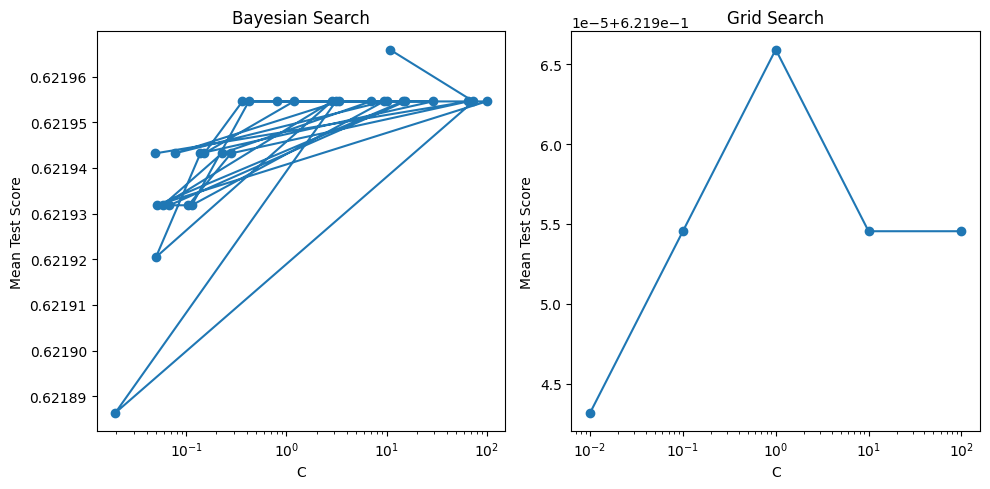

In [29]:
# plot the graph of mean_test_score with hyperparameter c for bayesian and grid search

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(bayes_search_linear_results['param_C'], bayes_search_linear_results['mean_test_score'], linestyle='-', marker='o')
plt.title('Bayesian Search')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

plt.subplot(1, 2, 2)
plt.plot(grid_search_linear_results['param_C'], grid_search_linear_results['mean_test_score'], linestyle='-', marker='o')
plt.title('Grid Search')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

### SVM with other Kernels

In [39]:
X_new_small = X_new.sample(frac=0.05, random_state=RANDOM_STATE)
y_small = y.loc[X_new_small.index]

In [40]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_small, y_small, test_size=0.2, random_state=RANDOM_STATE, stratify=y_small)

#### Polynomial Kernals

In [41]:
data = []
for degree in (2, 3, 4):
    data_for_plot = {}
    data_for_plot['degree'] = degree
    
    model = SVC(random_state = RANDOM_STATE, kernel = 'poly', degree = degree)
    model.fit(X_train_new, y_train_new)
    y_pred = model.predict(X_test_new)
    
    data_for_plot['accuracy'] = accuracy_score(y_test_new, y_pred)
    data_for_plot['precision'] = precision_score(y_test_new, y_pred)
    data_for_plot['recall'] = recall_score(y_test_new, y_pred)
    data_for_plot['f1'] = f1_score(y_test_new, y_pred)
    data_for_plot['roc_auc'] = roc_auc_score(y_test_new, y_pred)
    
    data.append(data_for_plot)

print(pd.DataFrame(data))

   degree  accuracy  precision    recall        f1   roc_auc
0       2  0.556364   0.545195  0.982847  0.701346  0.529141
1       3  0.545455   0.539040  0.982847  0.696233  0.517536
2       4  0.546364   0.539326  0.987993  0.697759  0.518175


array([[<Axes: xlabel='degree'>, <Axes: xlabel='degree'>,
        <Axes: xlabel='degree'>],
       [<Axes: xlabel='degree'>, <Axes: xlabel='degree'>,
        <Axes: xlabel='degree'>],
       [<Axes: xlabel='degree'>, <Axes: xlabel='degree'>,
        <Axes: xlabel='degree'>]], dtype=object)

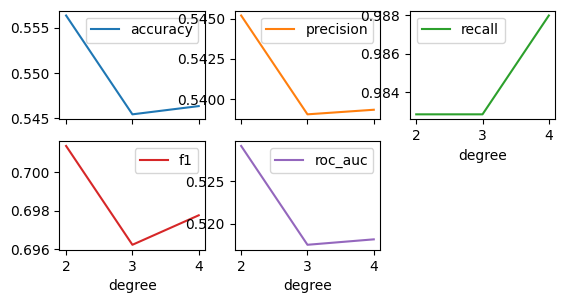

In [42]:
pd.DataFrame(data).set_index('degree').plot(subplots=True, layout=(3,3))

#### RBF Kernel


In [49]:
# data = []
# for gamma in (0.2):
#     data_for_plot = {}
#     data_for_plot['gamma'] = gamma
    
#     model = SVC(random_state = RANDOM_STATE, kernel = 'rbf', gamma = gamma)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     data_for_plot['accuracy'] = accuracy_score(y_test, y_pred)
#     data_for_plot['precision'] = precision_score(y_test, y_pred)
#     data_for_plot['recall'] = recall_score(y_test, y_pred)
#     data_for_plot['f1'] = f1_score(y_test, y_pred)
#     data_for_plot['roc_auc'] = roc_auc_score(y_test, y_pred)
    
#     data.append(data_for_plot)

gamma = 0.1
model = SVC(random_state = RANDOM_STATE, kernel = 'rbf', gamma = gamma)
model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
print_classification_metrics(y_test_new, y_pred)


Accuracy: 0.6245454545454545
Precision: 0.6426174496644296
Recall: 0.6569468267581475
F1 Score: 0.6497031382527566
ROC AUC: 0.6224772818510274


array([[<AxesSubplot: xlabel='gamma'>, <AxesSubplot: xlabel='gamma'>],
       [<AxesSubplot: xlabel='gamma'>, <AxesSubplot: xlabel='gamma'>],
       [<AxesSubplot: xlabel='gamma'>, <AxesSubplot: xlabel='gamma'>]],
      dtype=object)

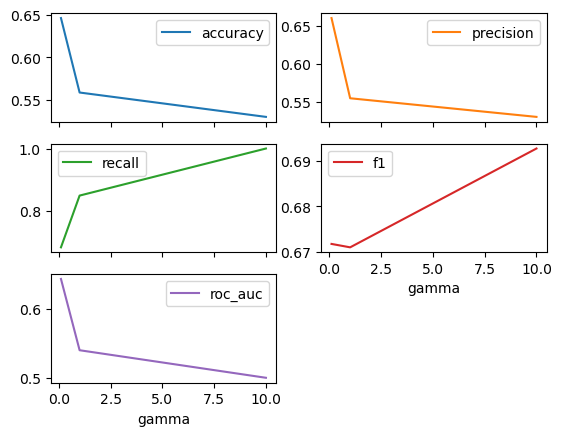

In [ ]:
# pd.DataFrame(data).set_index('gamma').plot(subplots=True, layout=(3,2))

In [ ]:
import numpy as np
from sklearn.svm import SVC

# Custom hybrid kernel combining RBF and Linear
def hybrid_kernel(X, Y, alpha=0.5, beta=0.5, gamma=0.1):
    # Ensure inputs are NumPy arrays
    X = np.array(X)
    Y = np.array(Y)
    
    # RBF component
    rbf_part = np.exp(-gamma * np.sum((X[:, None, :] - Y[None, :, :]) ** 2, axis=2))
    
    # Linear component
    linear_part = np.dot(X, Y.T)
    
    # Weighted combination of RBF and Linear
    return alpha * rbf_part + beta * linear_part

# Using the custom kernel in SVC
model = SVC(random_state=RANDOM_STATE, kernel=hybrid_kernel)

# Convert DataFrames to NumPy arrays for training and testing
X_train_new_np = X_train_new.to_numpy()
y_train_new_np = y_train_new.to_numpy()
X_test_new_np = X_test_new.to_numpy()
y_test_new_np = y_test_new.to_numpy()

# Fit the model
model.fit(X_train_new_np, y_train_new_np)

# Predict
y_pred = model.predict(X_test_new_np)

# Print classification metrics
print_classification_metrics(y_test_new_np, y_pred)

Accuracy: 0.64
Precision: 0.6463223787167449
Recall: 0.7084048027444254
F1 Score: 0.6759410801963993
ROC AUC: 0.6356337359950367


### Hyperparameter Tuning


In [54]:
# function to obtain the results using gridsearchCv

def get_results(X_train, y_train, X_test, y_test, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # save the grid search results for different hyperparameters
    grid_search_results = pd.DataFrame(grid_search.cv_results_)
    # keep only the mean test score and the hyperparameters
    grid_search_results = grid_search_results[['param_C', 'mean_test_score']]

    print('Best Parameters:', grid_search.best_params_)
    print('Best Score:', grid_search.best_score_)
    print('Best Estimator:', grid_search.best_estimator_)
    y_pred = grid_search.predict(X_test)
    print_classification_metrics(y_test, y_pred)
    
    return grid_search_results



In [56]:
# function to obtain the results using bayesian optimization

def get_bayes_results(X_train, y_train, X_test, y_test, model, param_space):
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param_space, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1)
    bayes_search.fit(X_train, y_train)

    # save the bayesian search results for different hyperparameters
    bayes_search_results = pd.DataFrame(bayes_search.cv_results_)
    # keep only the mean test score and the hyperparameters
    bayes_search_results = bayes_search_results[['param_C', 'mean_test_score']]

    print('Best Parameters:', bayes_search.best_params_)
    print('Best Score:', bayes_search.best_score_)
    print('Best Estimator:', bayes_search.best_estimator_)
    y_pred = bayes_search.predict(X_test)
    print_classification_metrics(y_test, y_pred)
    
    return bayes_search_results

In [57]:
# function to plot the graph of mean_test_score with hyperparameter c for bayesian and grid search

def plot_graph(grid_search_results, bayes_search_results):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(bayes_search_results['param_C'], bayes_search_results['mean_test_score'], linestyle='-', marker='o')
    plt.title('Bayesian Search')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')

    plt.subplot(1, 2, 2)
    plt.plot(grid_search_results['param_C'], grid_search_results['mean_test_score'], linestyle='-', marker='o')
    plt.title('Grid Search')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')

    plt.tight_layout()
    plt.show()



Best Parameters: {'C': 100}
Best Score: 0.6172727272727273
Best Estimator: SVC(C=100, degree=2, kernel='poly', random_state=42)
Accuracy: 0.6090909090909091
Precision: 0.5888501742160279
Recall: 0.869639794168096
F1 Score: 0.7022160664819944
ROC AUC: 0.5924601291923652
Best Parameters: OrderedDict([('C', 99.73706844630384)])
Best Score: 0.6177272727272728
Best Estimator: SVC(C=99.73706844630384, degree=2, kernel='poly', random_state=42)
Accuracy: 0.6090909090909091
Precision: 0.5888501742160279
Recall: 0.869639794168096
F1 Score: 0.7022160664819944
ROC AUC: 0.5924601291923652


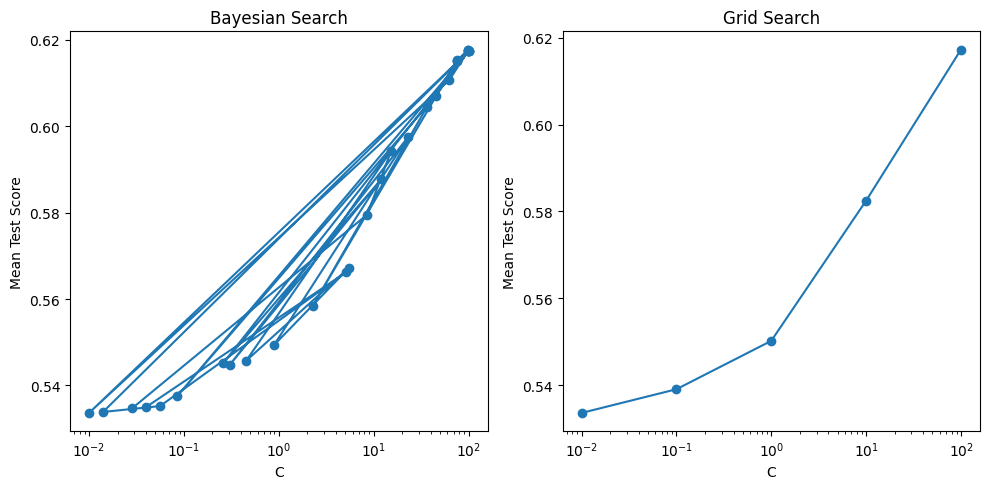

In [58]:
# get the results for the polynomial kernel that performed the best
model = SVC(random_state = RANDOM_STATE, kernel = 'poly', degree = 2)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search_results = get_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_grid)

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
}

bayes_search_results = get_bayes_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_space)

plot_graph(grid_search_results, bayes_search_results)


Best Parameters: {'C': 10, 'gamma': 0.01}
Best Score: 0.6438636363636363
Best Estimator: SVC(C=10, gamma=0.01, random_state=42)
Accuracy: 0.6472727272727272
Precision: 0.6484018264840182
Recall: 0.7307032590051458
F1 Score: 0.6870967741935484
ROC AUC: 0.641947374183424
Best Parameters: OrderedDict([('C', 2.766775653484181), ('gamma', 0.01)])
Best Score: 0.645
Best Estimator: SVC(C=2.766775653484181, gamma=0.01, random_state=42)
Accuracy: 0.6290909090909091
Precision: 0.6269956458635704
Recall: 0.7409948542024014
F1 Score: 0.6792452830188679
ROC AUC: 0.6219481040837926


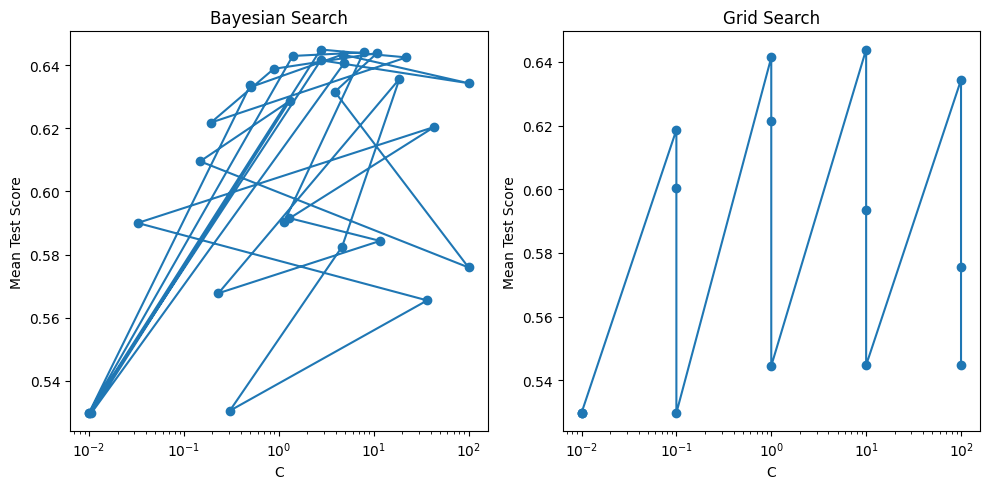

In [60]:
# get the results for the rbf kernel and also tuen the hyperparameter gamma

model = SVC(random_state = RANDOM_STATE, kernel = 'rbf')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1]
}

grid_search_results = get_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_grid)

param_space = {
    'C': Real(1e-2, 1e+2, prior='log-uniform'),
    'gamma': Real(1e-2, 1, prior='log-uniform')
}

bayes_search_results = get_bayes_results(X_train_new, y_train_new, X_test_new, y_test_new, model, param_space)

plot_graph(grid_search_results, bayes_search_results)


In [65]:
# perform hyperparameter tuning for the hybrid kernel without using the above functions

# Using the custom kernel in SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'alpha': [0.1, 0.5, 0.9],
    'beta': [0.1, 0.5, 0.9],
    'gamma': [0.01, 0.1, 1]
}

model = SVC(random_state=RANDOM_STATE, kernel=hybrid_kernel)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_new, y_train_new)

# save the grid search results for different hyperparameters
grid_search_results = pd.DataFrame(grid_search.cv_results_)
# keep only the mean test score and the hyperparameters
grid_search_results = grid_search_results[['param_C', 'param_alpha', 'param_beta', 'param_gamma', 'mean_test_score']]
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)
print('Best Estimator:', grid_search.best_estimator_)
y_pred = grid_search.predict(X_test_new)
print_classification_metrics(y_test_new, y_pred)


ValueError: Invalid parameter 'alpha' for estimator SVC(C=0.01, kernel=<function hybrid_kernel at 0x000001BC3CC7CC10>,
    random_state=42). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].